# 02_Model_Training
This notebook trains and evaluates classification models to predict product condition (new vs used).


### Enviroment

In [46]:
import os 
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import joblib
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


In [2]:
print("Current directory before change:", os.getcwd())

try:
    
    os.chdir("../")
    print("Current directory after change:", os.getcwd())

except FileNotFoundError:
    print("""
        FileNotFoundError - The specified directory does not exist or you are already in the root.
        If the code already worked once, do not run it again.
    """)

Current directory before change: c:\Users\Administrador\Desktop\ml_excercise\notebooks
Current directory after change: c:\Users\Administrador\Desktop\ml_excercise


In [33]:
df = pd.read_csv('data_clean/mla_eda.csv')
logging.info(f"Loaded data with shape: {df.shape}")

df.head()

2025-05-09 12:54:18,471 - INFO - Loaded data with shape: (100000, 10)


,condition,listing_type_id,price,buying_mode,status,initial_quantity,available_quantity,free_shipping,shipping_mode,non_mp_pay_count
0,0,bronze,80.0,1,0,1,1,False,3,3
1,1,silver,2650.0,1,0,1,1,False,2,2
2,1,bronze,60.0,1,0,1,1,False,2,3
3,0,silver,580.0,1,0,1,1,False,2,3
4,1,bronze,30.0,1,0,1,1,False,3,3


In [34]:
unique_listing_type = df['listing_type_id'].unique()
print(unique_listing_type)

['bronze' 'silver' 'free' 'gold_special' 'gold' 'gold_premium' 'gold_pro']


In [35]:
unique = df['free_shipping'].unique()
print(unique)

[False  True]


In [36]:
df = pd.get_dummies(df, columns=['listing_type_id'], drop_first=True)

df['free_shipping'] = df['free_shipping'].astype(int)

df.dtypes

condition                         int64
price                           float64
buying_mode                       int64
status                            int64
initial_quantity                  int64
available_quantity                int64
free_shipping                     int32
shipping_mode                     int64
non_mp_pay_count                  int64
listing_type_id_free               bool
listing_type_id_gold               bool
listing_type_id_gold_premium       bool
listing_type_id_gold_pro           bool
listing_type_id_gold_special       bool
listing_type_id_silver             bool
dtype: object

### head but with the last changed

In [37]:
df.head()

,condition,price,buying_mode,status,initial_quantity,available_quantity,free_shipping,shipping_mode,non_mp_pay_count,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver
0,0,80.0,1,0,1,1,0,3,3,False,False,False,False,False,False
1,1,2650.0,1,0,1,1,0,2,2,False,False,False,False,False,True
2,1,60.0,1,0,1,1,0,2,3,False,False,False,False,False,False
3,0,580.0,1,0,1,1,0,2,3,False,False,False,False,False,True
4,1,30.0,1,0,1,1,0,3,3,False,False,False,False,False,False


### Define features and target

In [38]:
X = df.drop(columns=['condition'])
y = df['condition']

logging.info(f"Feature set shape: {X.shape}, Target shape: {y.shape}")

2025-05-09 13:24:24,187 - INFO - Feature set shape: (100000, 14), Target shape: (100000,)


### Train-test split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
logging.info(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

2025-05-09 13:24:30,760 - INFO - Train shape: (80000, 14), Test shape: (20000, 14)


---
### Search and evaluation for model training

### Model -Random Forest

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred  = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


ROC AUC: 0.894757494421252
              precision    recall  f1-score   support

           0       0.87      0.77      0.82     10752
           1       0.77      0.86      0.81      9248

    accuracy                           0.81     20000
   macro avg       0.82      0.82      0.81     20000
weighted avg       0.82      0.81      0.81     20000



### Model - Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_lr  = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_proba_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression ROC AUC: 0.755918227815023
              precision    recall  f1-score   support

           0       0.70      0.71      0.70     10752
           1       0.66      0.65      0.65      9248

    accuracy                           0.68     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.68      0.68      0.68     20000




### Model Comparison and Key Takeaways

- **Random Forest:**  
  - **ROC AUC:** 0.895  
  - **Accuracy:** 0.81  
  - **Class 0 (new) →** Precision 0.87 | Recall 0.77 | F1 0.82  
  - **Class 1 (used) →** Precision 0.77 | Recall 0.86 | F1 0.81  

- **Logistic Regression:**  
  - **ROC AUC:** 0.756  
  - **Accuracy:** 0.68  
  - **Class 0 →** Precision 0.70 | Recall 0.71 | F1 0.70  
  - **Class 1 →** Precision 0.66 | Recall 0.65 | F1 0.65  

**Conclusion:** Random Forest clearly outperforms Logistic Regression across all metrics, especially in AUC +0.14 and overall F1 +0.11. Its higher recall on the “used” class also reduces false negatives. Therefore, Random Forest should be selected as the primary model, with potential next steps to further tune its hyperparameters or calibrate decision thresholds for specific business needs.  


---
### Top 10 Feature Importances

The bar chart shows that **price** is by far the most influential feature, followed by the `listing_type_id_free` flag, `initial_quantity`, and `available_quantity`. Lesser contributions come from payment‐method count and secondary listing types, indicating the model relies primarily on core listing details and pricing.  


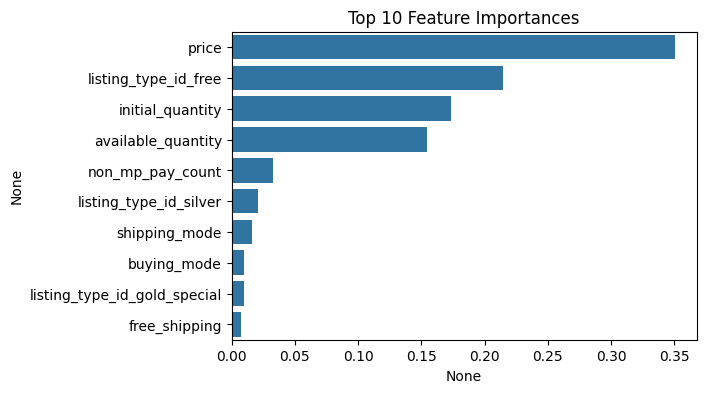

In [51]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title('Top 10 Feature Importances')
plt.show()

---
### ROC Curve

The ROC curve for the Random Forest model achieves an AUC of 0.89, demonstrating strong discrimination between new and used listings and a high true-positive rate even at low false-positive rates.  


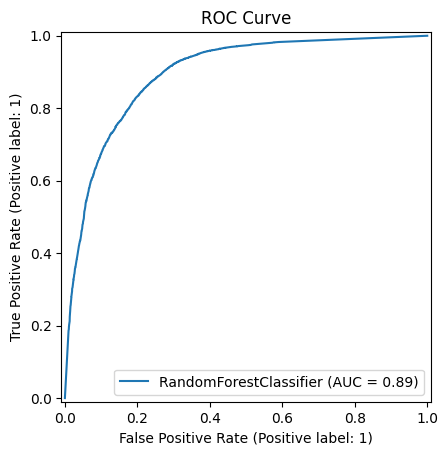

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

---
### Partial Dependence Plot of Price

The PDP reveals that lower prices (below ~\$200) sharply increase the likelihood of listings being classified as new, while beyond that range the probability plateaus around 0.3–0.4, indicating diminishing returns of higher prices on predicting condition.  


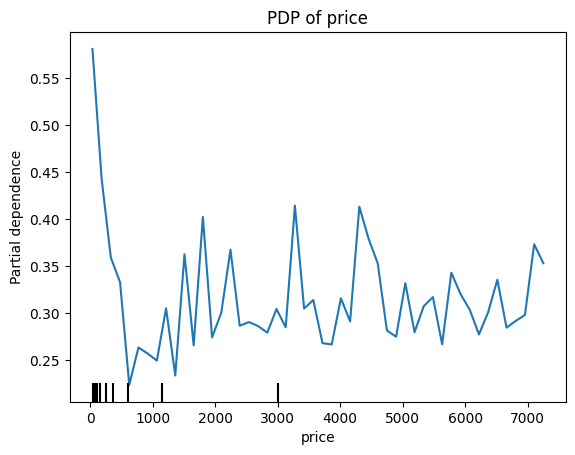

In [50]:
from sklearn.inspection import PartialDependenceDisplay

top_feat = importances.head(1).index[0]
PartialDependenceDisplay.from_estimator(model, X_train, [top_feat], grid_resolution=50)
plt.title(f'PDP of {top_feat}')
plt.show()


### Save the .pkl of model Random Forest

In [44]:
os.makedirs('best_model', exist_ok=True)

joblib.dump(model, 'best_model/randomforest.pkl')

['best_model/randomforest.pkl']